Data: https://zh.wikipedia.org/wiki/%E6%96%B0%E5%9E%8B%E5%86%A0%E7%8B%80%E7%97%85%E6%AF%92%E8%82%BA%E7%82%8E%E5%85%A8%E7%90%83%E7%96%AB%E6%83%85%E7%97%85%E4%BE%8B

Also here:
https://news.sina.cn/zt_d/yiqing0121

In [8]:
c = [
    4, 
    17,
    59,
    78, 
    92, 
    149, 
    131, 
    259, 
    444, 
    688, 
    769, 
    1771,
    957
]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

In [10]:
total = [c[0]]
for i in c[1:]:
    total.append(total[-1] + i)

In [11]:
# Define confidence interval.
ci = 0.95
# Convert to percentile point of the normal distribution.
# See: https://en.wikipedia.org/wiki/Standard_score
pp = (1. + ci) / 2.
# Convert to number of standard deviations.
nstd = stats.norm.ppf(pp)
print(nstd)

1.959963984540054


# Growth total

0.9890702726941633


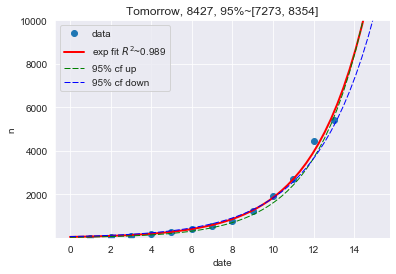

In [26]:
sns.set_style("darkgrid")
def exp(x, a, c):
    y = a ** (x - c)
    return y
    
xdata = np.arange(1, len(total)+1)
ydata = np.array(total)
# initial guess for curve fit coefficients
guess = [20, 1, 50000, 0]

popt, pcov = curve_fit(exp, xdata, ydata, sigma=np.sqrt(xdata))
# Standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
popt_up = popt + nstd * perr
popt_down = popt - nstd * perr
# print(popt_up, popt_down)
residuals = ydata- exp(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

x = np.linspace(0, 15, 50)
y = exp(x, *popt)
tmr = len(xdata) + 1
pred = int(exp(tmr, *popt))
pred_up = int(exp(tmr, *popt_up))
pred_down = int(exp(tmr, *popt_down))

plt.plot(xdata, ydata, 'o', markersize=6., label='data')
plt.plot(x, y, label=r'exp fit $R^2$~{}'.format(round(r_squared, 3)), c='r', lw=2.)
plt.plot(x, exp(x, *popt_up), c='g', dashes=[6, 2], lw=1., label='95% cf up')
plt.plot(x, exp(x, *popt_down), c='b', dashes=[6, 2], lw=1., label='95% cf down')
plt.xlabel('date')
plt.ylabel('n')
plt.ylim(1, 1E4)
plt.legend(loc='best')
plt.title("Tomorrow, {}, 95%~[{}, {}]".format(pred, pred_down, pred_up))
plt.savefig('Plots/1_29_2020.png', dpi=300)
plt.show()

# Growth rate is also exp

[  1.35435786 -11.0174122 ]


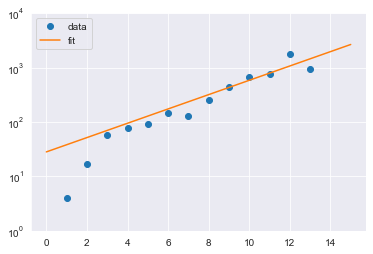

In [13]:
xdata = np.arange(1, len(total)+1)
ydata = np.array(c)
# initial guess for curve fit coefficients
guess = [20, 1, 50000, 0]

popt, pcov = curve_fit(exp, xdata, ydata, sigma=np.sqrt(xdata))
print(popt)

x = np.linspace(0, 15, 50)
y = exp(x, *popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x, y, label='fit')
plt.ylim(1, 1E4)
plt.yscale('log')
plt.legend(loc='best')
plt.show()

# Total won't converge

[1.64284653e+00 1.18805858e+04 7.90200258e-01 5.15464916e+00]


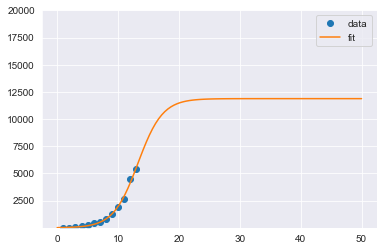

In [25]:
def sigmoid(x, a, n, b, c):
    y = n * 1 / (1  +  b * n * a ** (-c - x))
    return y

# initial guess for curve fit coefficients
ydata = np.array(total)
guess = [1, 20000, 2, 5]
popt, pcov = curve_fit(sigmoid, xdata, ydata, p0=guess, sigma=np.sqrt(xdata), bounds=(0, [10, 1E6, 20, 20]))
print(popt)

perr = np.sqrt(np.diag(pcov))
popt_up = popt + nstd * perr
popt_down = popt - nstd * perr

x = np.linspace(0, 50, 100)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x, y, label='fit')
# plt.plot(x, sigmoid(x, *popt_up), c='g', dashes=[6, 2], lw=1., label='95% cf up')
# plt.plot(x, sigmoid(x, *popt_down), c='b', dashes=[6, 2], lw=1., label='95% cf down')
plt.ylim(1, 2E4)
# plt.yscale('log')
plt.legend(loc='best')
plt.show()